# **1. Perkenalan Dataset**


Dataset: *Heart Disease* (berasal dari UCI Machine Learning Repository).

**Tujuan**: memprediksi ada/tidaknya penyakit jantung berdasarkan fitur klinis.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
url = '/content/drive/MyDrive/heart.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Ukuran dataset (baris, kolom)
df.shape

(1025, 14)

In [5]:
# Informasi tipe data & missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()
df['target'].value_counts(normalize=True)

,proportion
target,
1,0.513171
0,0.486829


Penjelasan:
Analisis distribusi target dilakukan untuk melihat keseimbangan kelas antara pasien yang memiliki penyakit jantung dan yang tidak. Hal ini penting untuk menentukan apakah dataset termasuk imbalanced atau tidak.

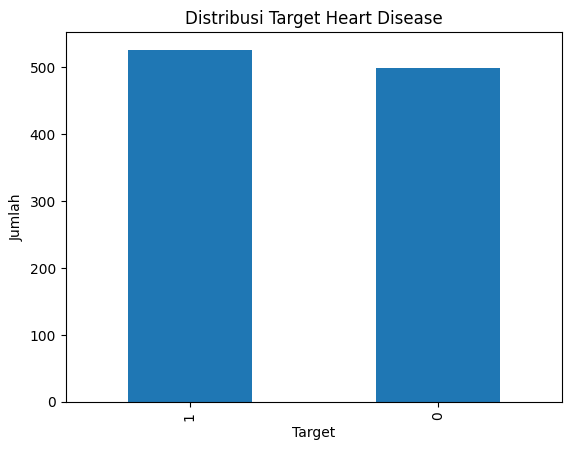

In [9]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar')
plt.title('Distribusi Target Heart Disease')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

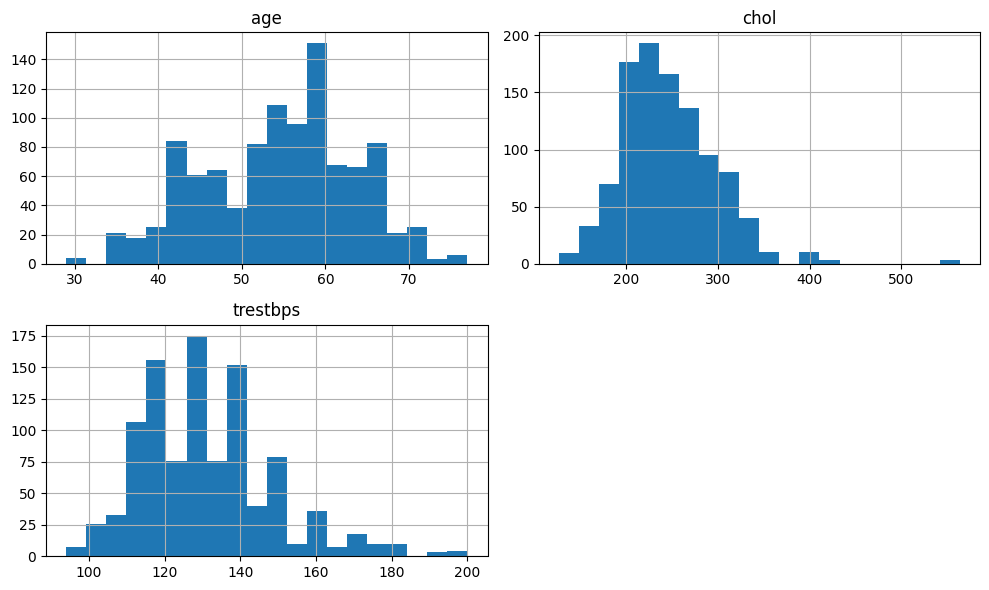

In [10]:
df[['age', 'chol', 'trestbps']].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()

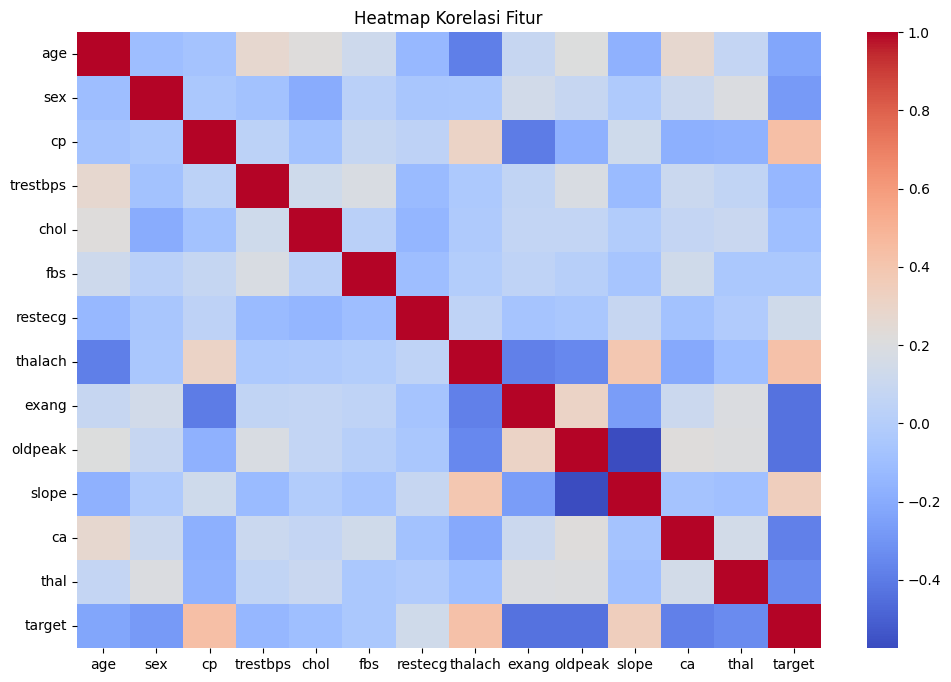

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()


Berdasarkan hasil Exploratory Data Analysis (EDA), dataset Heart Disease memiliki struktur data yang jelas dengan dominasi fitur numerik dan tidak ditemukan missing value. Distribusi target relatif seimbang sehingga dataset layak digunakan untuk pemodelan klasifikasi. Beberapa fitur menunjukkan korelasi terhadap target, sehingga preprocessing dan pelatihan model machine learning dapat dilanjutkan pada tahap berikutnya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
df.head()

# target
target_col = "target"

X = df.drop(columns=[target_col])
y = df[target_col]

# daftar kolom (sesuaikan kalau datasetmu beda)
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numerik:", num_cols)
print("Kategorikal:", cat_cols)

Numerik: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Kategorikal: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)
print("Distribusi target train:", y_train.value_counts(normalize=True))
print("Distribusi target test :", y_test.value_counts(normalize=True))

(820, 13) (205, 13)
Distribusi target train: target
1    0.513415
0    0.486585
Name: proportion, dtype: float64
Distribusi target test : target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

In [15]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Shape train setelah preprocessing:", X_train_prep.shape)
print("Shape test  setelah preprocessing:", X_test_prep.shape)

Shape train setelah preprocessing: (820, 30)
Shape test  setelah preprocessing: (205, 30)


In [16]:
# ambil nama fitur hasil onehot
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([num_cols, cat_feature_names])

X_train_prep_df = pd.DataFrame(X_train_prep.toarray() if hasattr(X_train_prep, "toarray") else X_train_prep,
                               columns=feature_names)
X_test_prep_df  = pd.DataFrame(X_test_prep.toarray() if hasattr(X_test_prep, "toarray") else X_test_prep,
                               columns=feature_names)

y_train_df = pd.DataFrame(y_train.reset_index(drop=True), columns=[target_col])
y_test_df  = pd.DataFrame(y_test.reset_index(drop=True), columns=[target_col])

X_train_prep_df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.811626,0.314729,0.895791,-1.921155,0.696525,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.152247,3.767643,0.779115,-0.725362,2.475810,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.262144,-0.242193,-0.368191,0.027545,-0.574393,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.262144,0.983035,-2.371116,1.046184,-0.743849,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.287339,0.203344,-1.009905,0.869030,-0.828577,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
import os

out_dir = "preprocessing/heart_preprocessed"
os.makedirs(out_dir, exist_ok=True)

X_train_prep_df.to_csv(os.path.join(out_dir, "X_train.csv"), index=False)
X_test_prep_df.to_csv(os.path.join(out_dir, "X_test.csv"), index=False)
y_train_df.to_csv(os.path.join(out_dir, "y_train.csv"), index=False)
y_test_df.to_csv(os.path.join(out_dir, "y_test.csv"), index=False)

print("Saved to:", out_dir)

Saved to: preprocessing/heart_preprocessed
